## recommended if you are able to do
- should be able to run script in local computer
- install pandas, numpy and sklearn

## First part
- Intro (super and unsupervised learning basics) 30min
- Talk about pipeline - train + val + test 15mins
- Demo data and fitting a line then overfitting, underfitting, effect of regularizatoin for 'just right' (while teaching each of 3 topics above)

## Second part
- regression, clustering, classification -  3 notebooks but clustering not very important
- regularization NOPE

## Mnist assignment prepare
- mnist assignment

overfitting, underfitting, regularization?

metric, loss => difference between regression and classification 
mean squared error

# Linear Regression
<img src='images/regression.ppm' width=400><br>
Example of 1D linear Regression

### Imports

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
np.set_printoptions(precision=3)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("dark")

Data description : [california_housing](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)

### Data Preprocessing

In [2]:
# load data
X, y = datasets.fetch_california_housing(as_frame=True, return_X_y=True)

# use only 1D as it's the simplest to visualise
# we use "Median Income" of a household to predict its price
X = X["MedInc"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# reshape X arrays into 2D from 1D
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# convert y arrays into NumPy arrays
y_train = y_train.values
y_test = y_test.values

# see the shapes of train/test samples
print("Train X", X_train.shape, "Train y", y_train.shape)
print("Test X", X_test.shape, "Test y", y_test.shape)

Train X (15480, 1) Train y (15480,)
Test X (5160, 1) Test y (5160,)


### Linear Regression Model

In [3]:
# define your model
model = LinearRegression()

In [4]:
# train the model
model.fit(X_train, y_train)

print('coefficients', model.coef_)
print('intercepts', model.intercept_)

coefficients [0.418]
intercepts 0.44967564199686105


# Example predictions

In [5]:
X_example = X_test[:10]
y_example = y_test[:10]


# manually predict first example
predicted = model.coef_[0] * X_example[0][0] + model.intercept_
    
print(predicted, y_example[0])

1.152216960355715 0.477


In [6]:
y_example_pred = model.predict(X_example)

pd.DataFrame({
    'actual': y_example,
    'predicted':  y_example_pred,
    'difference':  y_example_pred - y_example,
}).round(3)

,actual,predicted,difference
0,0.477,1.152,0.675
1,0.458,1.507,1.049
2,5.000,1.904,-3.096
3,2.186,2.847,0.661
4,2.780,2.006,-0.774
5,1.587,2.420,0.833
6,1.982,2.574,0.592
7,1.575,1.992,0.417
8,3.400,2.457,-0.943
9,4.466,3.840,-0.626


# Mean Squared Error

In [7]:
mse = model.score(X_train, y_train)
print("Train mean squared error", mse)

mse = model.score(X_test, y_test)
print("Test mean squared error", mse)

Train mean squared error 0.47430292180263645
Test mean squared error 0.47083837938023376


# Plots

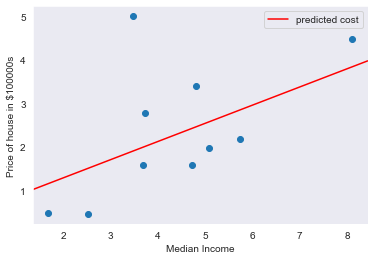

In [8]:
# choose 2 points to get the line
m = model.coef_[0]
c = model.intercept_

x1 = X_example[0, 0]
y1 = c + m * x1

# plot the points (using only first component of X as 2D graph is easy to interpret)
plt.scatter(X_example[:, 0], y_example)
# plot the line
plt.axline((x1, y1), slope=m, c="red", label="predicted cost")

# graph attributes
plt.xlabel("Median Income")
plt.ylabel("Price of house in $100000s")
plt.legend()